# 题目

> 给定一个 m x n 二维字符网格 board 和一个单词（字符串）列表 words，返回所有二维网格上的单词。  
单词必须按照字母顺序，通过相邻的单元格内的字母构成，其中“相邻”单元格是那些水平相邻或垂直相邻的单元格。同一个单元格内的字母在一个单词中不允许被重复使用。

> 示例1：  
输入：board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]  
输出：["eat","oath"]

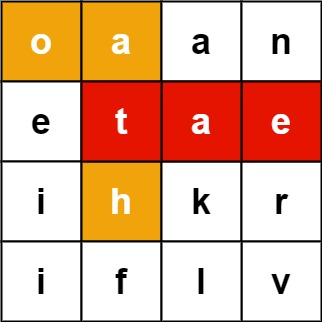

# 方法一：字典树

> 根据题意，我们需要逐个遍历二维网格中的每一个单元格；然后搜索从该单元格出发的所有路径，找到其中对应 words\textit{words}words 中的单词的路径。因为这是一个回溯的过程，所以我们有如下算法：  
- 遍历二维网格中的所有单元格。
- 深度优先搜索所有从当前正在遍历的单元格出发的、由相邻且不重复的单元格组成的路径。因为题目要求同一个单元格内的字母在一个单词中不能被重复使用；所以我们在深度优先搜索的过程中，每经过一个单元格，都将该单元格的字母临时修改为特殊字符（例如 #），以避免再次经过该单元格。
- 如果当前路径是 words 中的单词，则将其添加到结果集中。如果当前路径是 words 中任意一个单词的前缀，则继续搜索；反之，如果当前路径不是 words 中任意一个单词的前缀，则剪枝。我们可以将 words 中的所有字符串先添加到前缀树中，而后用 $O(|S|)$ 的时间复杂度查询当前路径是否为 words 中任意一个单词的前缀。

> 在具体实现中，我们需要注意如下情况：  
- 因为同一个单词可能在多个不同的路径中出现，所以我们需要使用哈希集合对结果集去重。
- 在回溯的过程中，我们不需要每一步都判断完整的当前路径是否是 words 中任意一个单词的前缀；而是可以记录下路径中每个单元格所对应的前缀树结点，每次只需要判断新增单元格的字母是否是上一个单元格对应前缀树结点的子结点即可。

## 复杂度

- 时间复杂度: $O(m×n×3^{l-1})$，其中 $m$ 是二维网格的高度， $n$ 是二维网格的宽度， $l$ 是最长单词的长度。

> 需要遍历 $m×n$ 个单元格，每个单元格最多需要遍历 $4×3^{l-1}$ 条路径（起始格有4个相邻方向可选，之后的所有格都只有3个相邻方向，因为不能走回头路）。

- 空间复杂度:：$O(k×l)$，其中 $k$ 是 words 的长度， $l$ 为最长单词的长度。

> 最坏情况下，我们需要 $O(k×l)$ 用于存储前缀树。

## 代码

In [1]:
from collections import defaultdict

In [2]:
# 字典树
class Trie:
    def __init__(self):
        # 字典树中每一个节点的子节点都用一个字典储存：key是当前节点指向的字符；value是子节点Trie
        # 每个节点在创建时就已经附带了一个用于储存子节点的字典children
        self.children = defaultdict(Trie)
        self.word = ""

    # 将单词插入字典树
    def insert(self, word):
        cur = self
        for c in word:
            cur = cur.children[c]  # 移动到key为c的那个子节点
        cur.is_word = True
        cur.word = word  # 代表某单词末尾的节点记录了这个单词

In [3]:
# 解法
class Solution:
    def findWords(self, board, words):
        trie = Trie()
        # 将words中的所有单词插入字典树
        for word in words:
            trie.insert(word)

        # 以字典树中某个节点为根节点（now），以某个格子[i1][j1]为起始点，搜索可能的路径同时在字典树中向深层探索，在搜索过程中记录答案
        def dfs(now, i1, j1):
            # 查看当前节点的children字典中是否有一个等于当前字符board[i1][j1]的key
            if board[i1][j1] not in now.children:
                # 如果当前字符不构成字典树中任何一个单词的前缀，则直接返回
                return

            ch = board[i1][j1]

            # 由于当前单词是某word的前缀中的某个字母，因此移动到代表当前字符的子节点
            now = now.children[ch]
            # 如果该节点的word属性不为空，说明找到了一个答案
            if now.word != "":
                ans.add(now.word)

            # 每经过一个格子，将这个格子标为"#"，防止重复遍历
            board[i1][j1] = "#"
            # 遍历相邻的四个格子
            for i2, j2 in [(i1 + 1, j1), (i1 - 1, j1), (i1, j1 + 1), (i1, j1 - 1)]:
                # 只要相邻格子没有出界，向下继续搜索
                if 0 <= i2 < m and 0 <= j2 < n:
                    # 下一次遍历的根节点为当前节点的子节点，起始格子为[i2][j2]
                    dfs(now, i2, j2)
            
            # 在走完以某个格子为起始点的所有路径后，将被标为"#"的格子恢复原状
            board[i1][j1] = ch

        ans = set()
        m, n = len(board), len(board[0])

        # 以网格中的每个格子作为起始点进行dfs
        for i in range(m):
            for j in range(n):
                dfs(trie, i, j)

        return list(ans)

#### 测试一

In [4]:
board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]]
words = ["oath","pea","eat","rain"]

test = Solution()
test.findWords(board, words)

['eat', 'oath']

#### 测试二

In [5]:
board = [["a","b"],["c","d"]]
words = ["abcb"]

test = Solution()
test.findWords(board, words)

[]